# Logistic Regression

We used the linear regression model on the breast cancer data set, and we had a decent result. Now we are going to model the data with logistic regression, and see if there is any improvements.


In [1]:
import numpy as np 
import pandas as pd 
import random
from numpy import log, dot, e
from numpy.random import rand
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statistics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AmyrMa/INDE-577/main/data/data.csv")
df = df.drop(['id','Unnamed: 32'], axis = 1)
df['diagnosis'] = np.where(df.diagnosis.values == 'M', 0, 1)
y = np.array(df['diagnosis'])
X = df.drop(['diagnosis'], axis=1)

In [3]:
sc = MinMaxScaler(feature_range=(-1,1))
X = sc.fit_transform(X)

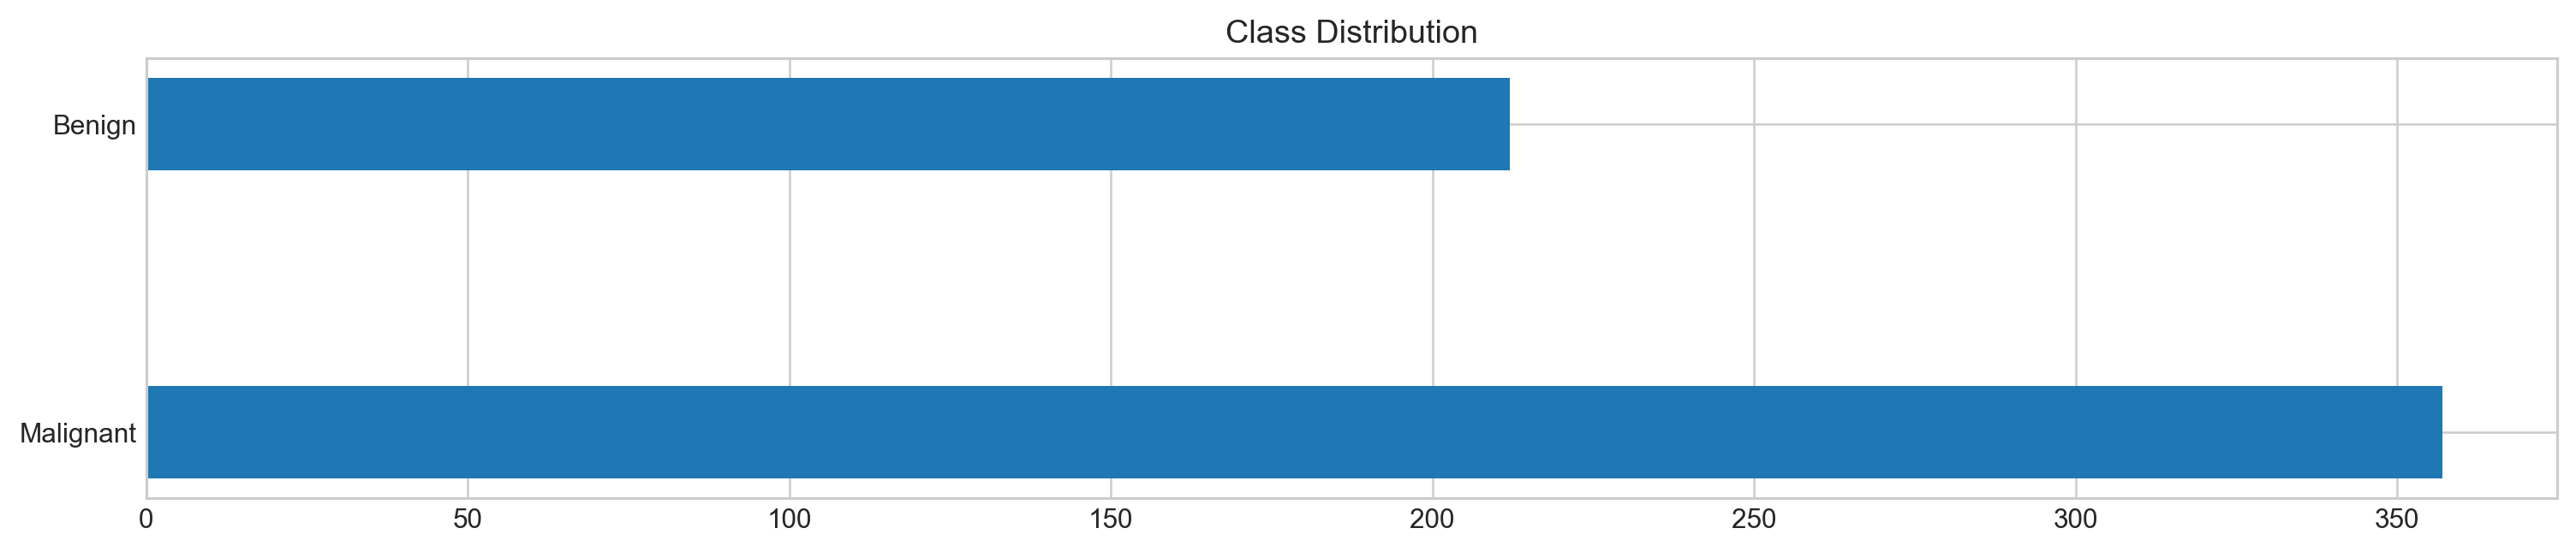

In [4]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,3)
plt.barh(['Malignant','Benign'],[sum(y), len(y)-sum(y)], height=0.3)
plt.title('Class Distribution')
plt.show()

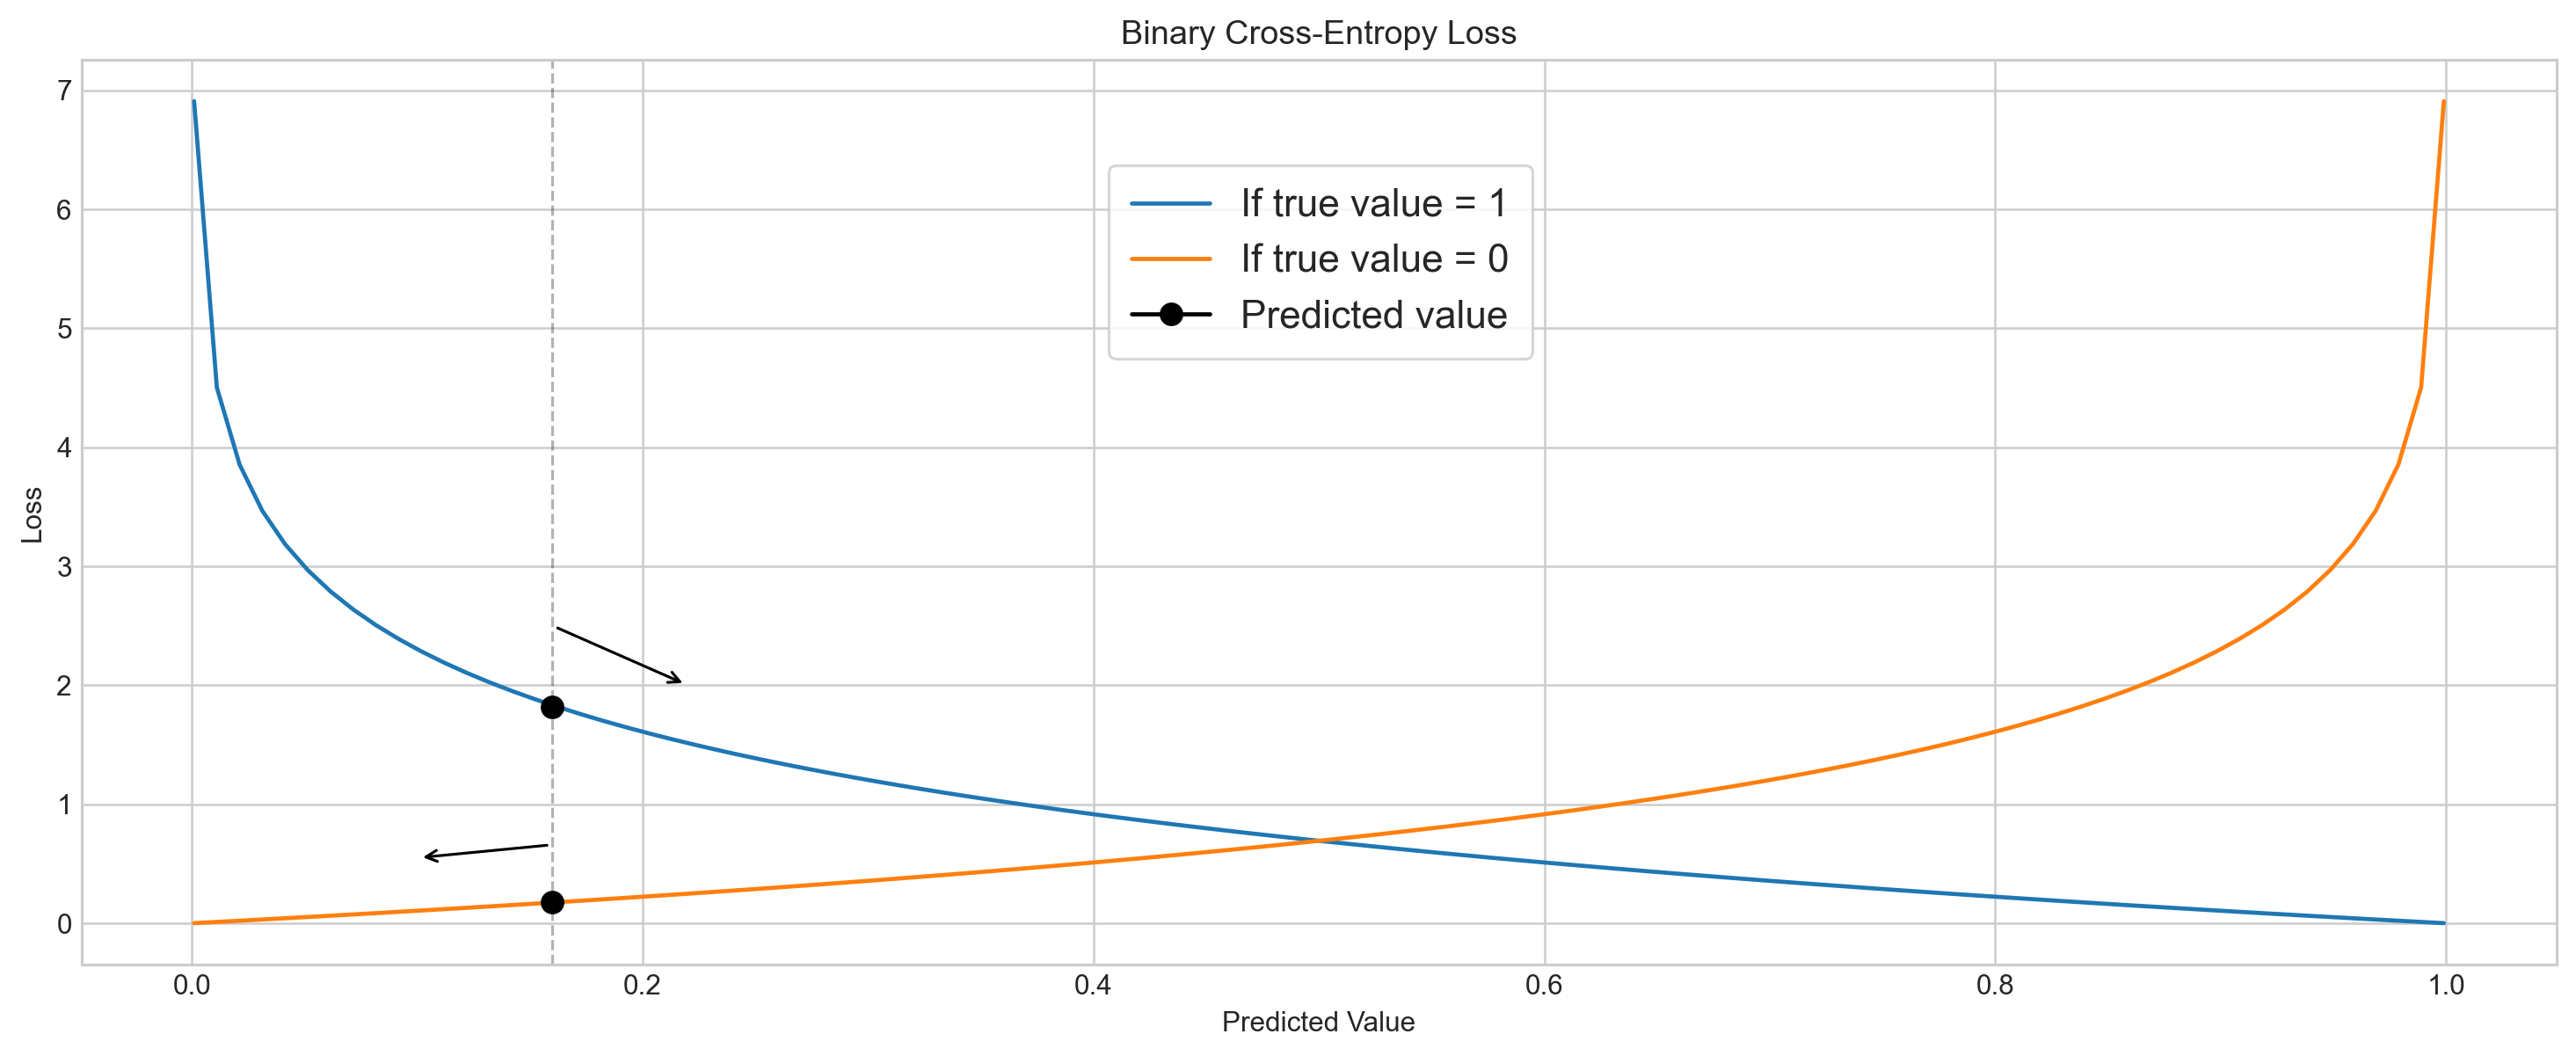

In [5]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,6)

#plt.subplot(121)
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 1')
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(1 - i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 0')

plt.plot(0.16, 1.818352371073392, marker='.', markersize=15, c='k', label='Predicted value')
plt.plot(0.16, 0.17708679723835707, marker='.', markersize=15, c='k')

plt.axvline(0.16, c='k', alpha=0.3, ls='--', lw=1)

plt.annotate("", xy=(0.22, 2), xytext=(0.16, 2.5), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.1, 0.55), xytext=(0.16, 0.66), arrowprops=dict(arrowstyle="->"))

plt.legend(loc=(0.415,0.67), frameon=True, fontsize=14, borderpad=.6)
plt.title('Binary Cross-Entropy Loss')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.show()

In [6]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))
def loss_function(X, y, weights):
    h = sigmoid(X, weights)
    m = y.shape[0]
    loss = 1/m * (-y * np.log(h) - (1 - y) * np.log(1 - h))
    return loss

def gradient_descent(X, h, y):
    m = y.shape[0]
    gradient = 1/m * np.dot(X.T, (h - y))
    return gradient

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

class MY_LogisticRegression:
    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        weights = np.zeros(X.shape[1])
        m = X.shape[0]
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = sigmoid(X, weights)
            gradient = gradient_descent(X, y_hat, y)
            weights = update_weight_loss(weights, lr, gradient)
            # Saving Progress
            loss.append(loss_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = sigmoid(X, self.weights)
        # Returning binary result
        return [1 if i > 0.65 else 0 for i in z]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)
model = MY_LogisticRegression()
model.fit(X_train, y_train, lr=0.7)
y_pred = model.predict(X_test)

In [8]:
accuracy_score(y_pred,y_test)

0.958041958041958

In [9]:
model = MY_LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.986013986013986

## Conclusion
We see that the learning rate played an important role in this model. Also we have set the thershold at 0.65. Since we saw that most patients are more likely have malignant as the result. Logistic model has similar performance compared to the linear regression.